Author: Carlos Roberto de Melo

Date: 04/16/2020

Obj:
1. Normalizar as imagens já registradas e centralizadas pelo seu tempo de exposição
2. Realizar a razão entre as bandas
3. Após obter a imagem 'filtro', que é a feita a partir da razão entre entre as bandas e uma média elíptica, obter a imagem dos arcos gravitacionais.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from mpdaf.obj import Image, WCS
import astropy.units as u
from mpdaf.obj import deg2sexa, sexa2deg

Nos blocos abaixo estamos considerando que as imagens já foram recortadas, giradas e registradas.

A ideia é normalizá-las por seu tempo de exposição, e então tomar a razão entre as duas diferentes bandas. O resultado será utilizado para formar um filtro elíptico, que mais tarde será utilizado para revelar os arcos gravitacionais. Essa razão entre as bandas é necessária para levar em conta o gradiente de cor.

[INFO] 750 x 750 Image (/home/carlos/Desktop/ESO325 HST Data Reduction/Data/F814W_centerized.fits)
[INFO] .data(750 x 750) (no unit), no noise
[INFO] center:(-38:10:33.4195,13:43:33.2207) size:(30.000",30.000") step:(0.040",0.040") rot:-0.0 deg frame:FK5
[INFO] 750 x 750 Image (/home/carlos/Desktop/ESO325 HST Data Reduction/Data/F475W_centerized.fits)
[INFO] .data(750 x 750) (no unit), no noise
[INFO] center:(-38:10:33.4195,13:43:33.2207) size:(30.000",30.000") step:(0.040",0.040") rot:0.0 deg frame:FK5


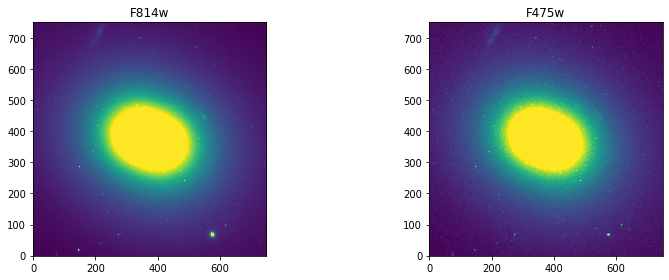

In [3]:
f814w = Image('/home/carlos/Desktop/ESO325 HST Data Reduction/Data/F814W_centerized.fits',ext=1) #Open File
f475w = Image('/home/carlos/Desktop/ESO325 HST Data Reduction/Data/F475W_centerized.fits', ext=1)

f814w.info() #Display informations
f475w.info()

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 4), tight_layout=True)

f814w.plot(ax=ax1, vmin=0, vmax=1, title='F814w', zscale=True)
f475w.plot(ax=ax2, vmin=0, vmax=1, title='F475w', zscale=True)

In [4]:
#Here we normalize the imagens
    #Tempo de exposição retirado dos headers
f475_time = 3501.
f814_time = 18882.

f475w = f475w/f475_time
f814w = f814w/f814_time

[INFO] 750 x 750 Image (/home/carlos/Desktop/ESO325 HST Data Reduction/Data/F475W_centerized.fits)
[INFO] .data(750 x 750) (no unit), no noise
[INFO] center:(-38:10:33.4195,13:43:33.2207) size:(30.000",30.000") step:(0.040",0.040") rot:0.0 deg frame:FK5


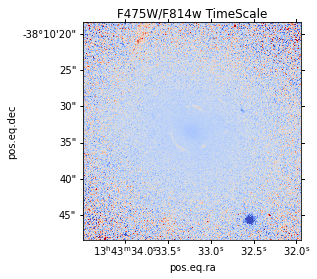

In [5]:
#For compute the ratio of two images.
    
F475w_divided_F814w = f475w/f814w #Take the ratio
F475w_divided_F814w.info() #Display the informations

F475w_divided_F814w.plot(zscale=True,cmap='coolwarm',use_wcs=True, title='F475W/F814w TimeScale') #Display the result
plt.savefig('/home/carlos/Desktop/ESO325 HST Data Reduction/Images/F475_divided_F814_timeScale.png',fmt='png',dpi=1200) #Save Image
F475w_divided_F814w.write('/home/carlos/Desktop/ESO325 HST Data Reduction/Data/F475_divided_F814_timeScale.fits') #Save fits file with ratio image

#.plot
    #vmin/vmax: minimum/maximum value of colorbar
    #colorbar: 'v' add colorbor; 'f' remove colorbar
    #cmap: colours for the map
    #use_wcs: plot with WCS coordinates. If False, display in px coordinates   

##################################################################

From here, we assume that the ellipsed profile is already ready

##################################################################


[INFO] 750 x 750 Image (/home/carlos/Desktop/ESO325 HST Data Reduction/Data/Filtro.fits)
[INFO] .data(750 x 750) (no unit), no noise
[INFO] center:(-38:10:33.4195,13:43:33.2207) size:(30.000",30.000") step:(0.040",0.040") rot:0.0 deg frame:FK5


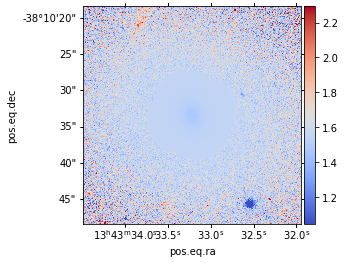

In [6]:
    #Open the F475W/F814W, centralized and radial average
    #Após construir o filtro, o abrimos
filtro = Image('/home/carlos/Desktop/ESO325 HST Data Reduction/Data/Filtro.fits')
filtro.info()
filtro.plot(zscale=True, colorbar='v',cmap='coolwarm',use_wcs=True)  

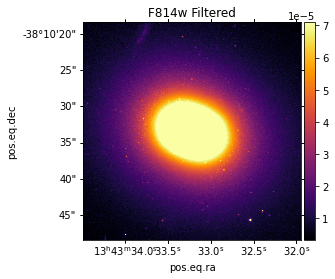

In [7]:
#Now we aply the radial_filter above in the F814W image time scaled
f814w_filtered = f814w*filtro
f814w_filtered.plot(zscale=True, use_wcs=True, colorbar='v', cmap='inferno', title='F814w Filtered')
plt.savefig('/home/carlos/Desktop/ESO325 HST Data Reduction/Images/F814W_filtered.png',fmt='png',dpi=1200)
f814w_filtered.write('/home/carlos/Desktop/ESO325 HST Data Reduction/Data/F814w_Filtered.fits')

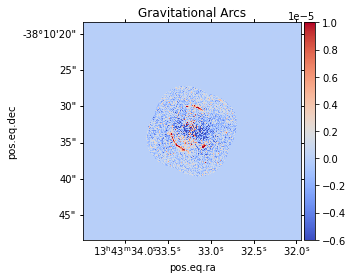

In [8]:
#Now we get the gravitational arcs
arcs = f475w - f814w_filtered
arcs.write('/home/carlos/Desktop/ESO325 HST Data Reduction/Data/Gravitational Arcs.fits')
arcs.plot(vmin=-6e-6, vmax=1e-5, cmap='coolwarm', colorbar='v', use_wcs=True, title='Gravitational Arcs')
plt.savefig('/home/carlos/Desktop/ESO325 HST Data Reduction/Images/Gravitational Arcs.png',fmt='png',dpi=1200)